# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Eldy Effendi
- **Email:** eldykoplak@gmail.com
- **ID Dicoding:** Eldy Effendi

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Jam Berapa Penyewaan Sepeda Terbanyak dan Terkecil?
- Pertanyaan 2: Pada Musim Apa Penyewaan Sepeda Mencapai Puncaknya?
- Pertanyaan 3: Bagaimana Kinerja Penyewaan Sepeda Dalam Beberapa Tahun Terakhir?

## Import Semua Packages/Library yang Digunakan

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [24]:
#Menampilkan data day
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [26]:
#Menampilkan data hour
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Gathering data ke sumber file dari hour.csv dan day.csv
- Menggunakan variabel dataframe hour_df dan day_df
- Menampilkan sebagian data hour dengan head()
- Menampilkan sebagian data day dengan head()

### Assessing Data

**Memeriksa tipe data**

In [5]:
print("Tipe data day_df : \n")
day_df.info()
print("\n Tipe data hour_df : ")
hour_df.info()

Tipe data day_df : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

 Tipe data hour_df : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

**Memeriksa apakah ada missing value pada dataframe hour_df dan day_df**

In [6]:
cek_hour_missing = hour_df.isna().sum()
cek_day_missing = day_df.isna().sum()

print("cek missing value hour: \n")
display(cek_hour_missing)
print("\ncek missing value day :")
display(cek_day_missing)

cek missing value hour: 



,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0



cek missing value day :


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Memeriksa duplikasi data**

In [7]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


**Memeriksa parameter statistik**

In [8]:
statistik_hour = hour_df.describe()
statistik_day = day_df.describe()

print("Data statistik Hour: \n")
display(statistik_hour)
print("\nData statistik Day: ")
display(statistik_day)

Data statistik Hour: 



,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000



Data statistik Day: 


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Menampilkan masalah tipe data dteday yang seharusnya date
  bukan object
- Menampilkan masalah tipe data int pada field season yang
  sebaiknya menjadi kategori, karena season mempunyai sifat kategori atau bisa diinisialisasi menjadi kata seasonnya sendiri sesuai dokumentasi datasetnya.
- Memeriksa dengan mencari missing value pada data hour dan
  day, lalu hasilnya adalah tidak ada missing value.
- Mencetak dan menampilkan duplikasi data, hasilnya 0 (tidak ada)


### Cleaning Data

- Mengganti tipe data dteday yang tadinya 'object' akan diubah
  menjadi 'datetime'
- Mengganti nama kolom agar mudah dibaca
- Mengganti tipe data int pada field season yang
  sebaiknya menjadi kategori, karena season mempunyai sifat kategori atau bisa diinisialisasi menjadi kata seasonnya sendiri sesuai dokumentasi datasetnya.
- Konversi data year dari int menjadi kategori pada day_df dan hour_df

**Mengganti tipe data dteday yang tadinya 'object' akan diubah menjadi 'datetime'**

In [9]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Mengganti nama kolom hour dan day agar mudah dibaca untuk yr, dan mnth**

In [10]:
hour_df.rename(columns={'yr':'year','mnth':'month', 'hr':'hours'},inplace=True)
day_df.rename(columns={'yr':'year','mnth':'month'},inplace=True)
# konversi year menjadi: 0:2011, 1:2012
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    object        
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

<ipython-input-10-e8349c97502f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.year.replace((0,1), ('2011','2012'), inplace=True)
<ipython-input-10-e8349c97502f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

**Konversi data pada field season yang sebaiknya menjadi kategori dari int, karena season mempunyai sifat kategori atau bisa diinisialisasi menjadi kata seasonnya sendiri sesuai dokumentasi datasetnya.**

In [11]:
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   year        731 non-null    object        
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

<ipython-input-11-b1952489b9c7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
<ipython-input-11-b1952489b9c7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

**Konversi data year dari int menjadi kategori pada day_df dan hour_df**

In [12]:
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   year        731 non-null    object        
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Berhasil mengganti tipe data dteday yang tadinya 'object' akan diubah
  menjadi 'datetime'
- Berhasil memperbaiki nama kolom agar mudah dibaca
- Berhasil Mengganti tipe data int pada field season yang
  sebaiknya menjadi kategori, karena season mempunyai sifat kategori atau bisa diinisialisasi menjadi kata seasonnya sendiri sesuai dokumentasi datasetnya.
- Berhasil Konversi data year dari int menjadi kategori pada day_df dan hour_df

## Exploratory Data Analysis (EDA)

### Explore ...

**Eksplorasi data hour_df**

In [13]:
all_hour = hour_df.describe(include="all")

print("Semua parameter hour:\n")
display(all_hour)

Semua parameter hour:



,instant,dteday,season,year,month,hours,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan rangkuman data statistik pada hour_df diatas, diperoleh jumlah penyewa sepeda yaitu 17379, dan penyewaan sepeda antara jam 00:00 sampai 23:00 didapatkan rata-rata penyewaan ada pada jam 11:54.

**Eksplorasi penyewaan berdasarkan jam yang ada pada data hours**

In [14]:
hour_df.groupby(by="hours").agg({
    "cnt": ["sum"]
})

,cnt
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


Pada rangkuman data diatas, diperoleh penyewaan sepeda paling banyak ada di jam 17:00

**Eksplorasi data day_df**

In [15]:
day_df.describe(include='all')

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari rangkuan data statistik day_df diatas diperolah rata rata penyewaan perhari adalah 4504 orang, jumlah terendah penyewa perhari adalah 22 dan tertinggi adalah 8714

**Memuat jumlah penyewaan permusim/season**

In [16]:
day_df.groupby(by="season").cnt.sum().sort_values(ascending=False)

,cnt
season,
Fall,1061129
Summer,918589
Winter,841613
Spring,471348


Dari tampilan data jumlah sewa sepeda permusim diatas, diperoleh bahwa season fall lebih banyak penyewa sepeda yaitu sebanyak 1.061.129 tersewa, sedangkan pada season spring merupakan paling sedikit penyewa sepeda yaitu sebanyak 471.348 tersewa.

**Menampilkan data penyewaan pertahun berdasarkan data year, dilengkapi jumlah data registered dan casual**

In [17]:
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


Dari data diatas, diperoleh jumlah yang mendaftar member penyewaan dan yang belum terdaftar, mengalami kenaikan jumlah penyewa dari tahun 2011 ke tahun 2012

**Insight:**
- Penyewaan Sepeda Berdasarkan Jam: Puncak penyewaan sepeda terjadi pada jam 17:00, sementara rata-rata penyewaan tercatat sekitar jam 11:54.

- Penyewaan Sepeda Berdasarkan Hari: Rata-rata penyewaan sepeda per hari adalah 4504 unit, dengan fluktuasi yang signifikan antara jumlah penyewa terendah (22) dan tertinggi (8714).

- Penyewaan Sepeda Berdasarkan Musim: Musim gugur (Fall) mencatat jumlah penyewaan tertinggi (1.061.129 unit), sementara musim semi (Spring) mencatat penyewaan paling sedikit (471.348 unit).

- Penyewaan Sepeda Berdasarkan Tahun: Terdapat kenaikan jumlah penyewa sepeda dari tahun 2011 ke 2012, baik untuk penyewa terdaftar (registered) maupun tidak terdaftar (casual).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Jam Berapa Penyewaan Sepeda Terbanyak dan Terkecil?

<ipython-input-18-aa9e92553e4a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hours", y="cnt", data=total_rentals_by_hour.sort_values(by="cnt", ascending=False).head(5),
<ipython-input-18-aa9e92553e4a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hours", y="cnt", data=total_rentals_by_hour.sort_values(by="cnt", ascending=True).head(5),


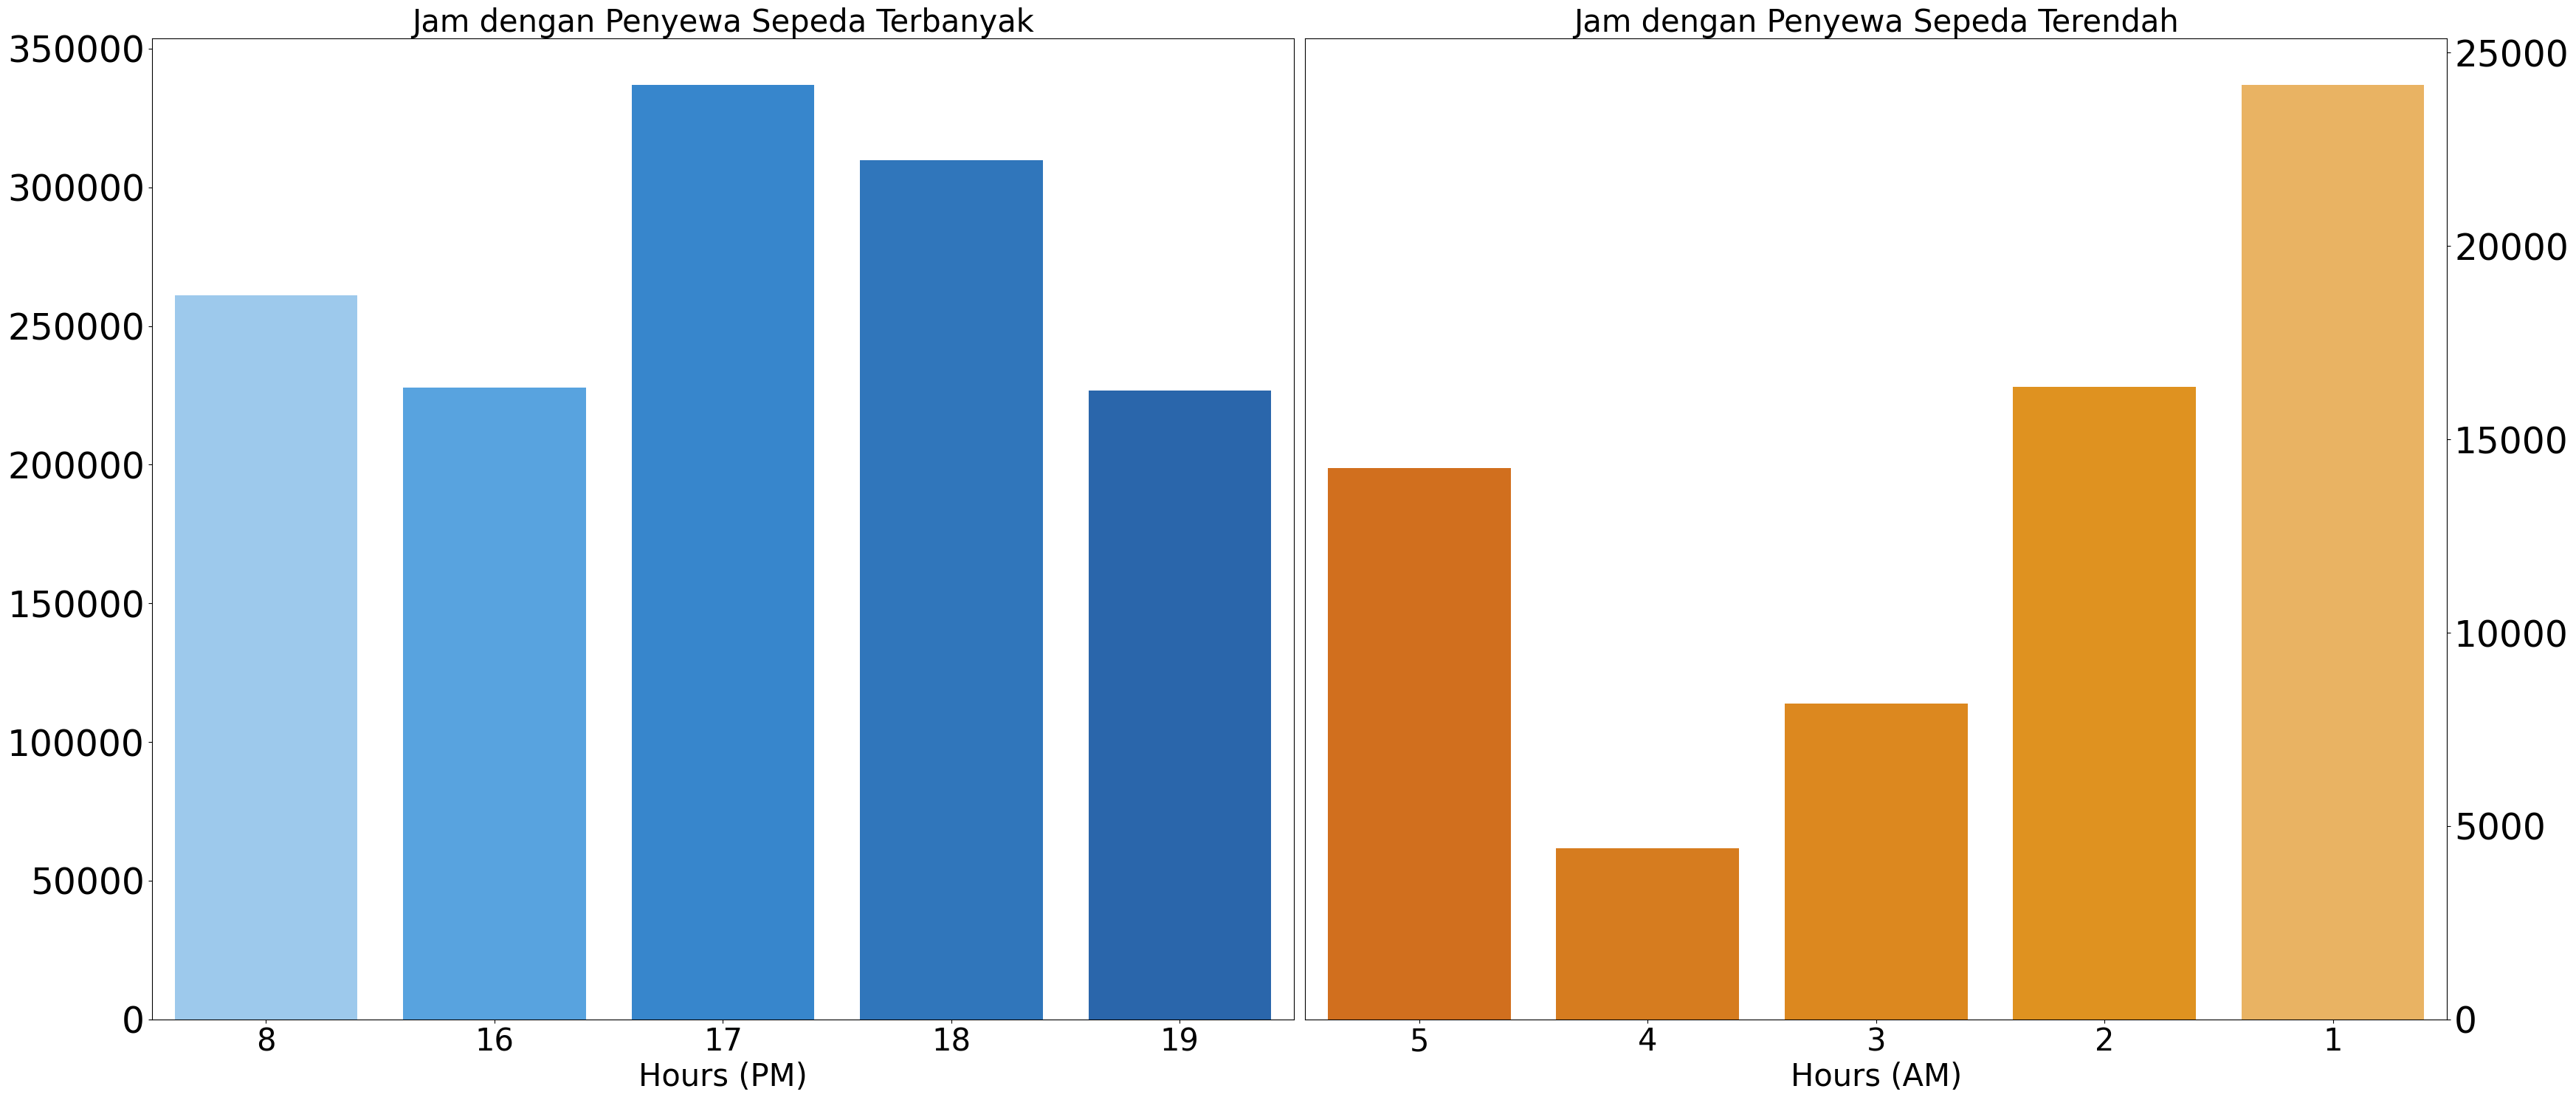

In [18]:
# Mengelompokkan data berdasarkan 'hours' dan menjumlahkan cnt
total_rentals_by_hour = hour_df.groupby("hours")["cnt"].sum().reset_index()

# Membuat figure dengan dua subplot, ukuran (35, 15)
fig, axes = plt.subplots(1, 2, figsize=(35, 15))

# Membuat barplot untuk jam dengan jumlah penyewaan sepeda tertinggi
sns.barplot(x="hours", y="cnt", data=total_rentals_by_hour.sort_values(by="cnt", ascending=False).head(5),
            palette=["#90CAF9", "#42A5F5", "#1E88E5", "#1976D2", "#1565C0"], ax=axes[0])

# Mengatur pengaturan untuk subplot pertama
axes[0].set_xlabel("Hours (PM)", fontsize=30)
axes[0].set_title("Jam dengan Penyewa Sepeda Terbanyak", fontsize=30, loc="center")
axes[0].tick_params(axis='x', labelsize=30)
axes[0].tick_params(axis='y', labelsize=35)
axes[0].set_ylabel(None)

# Membuat barplot untuk jam dengan jumlah penyewaan sepeda terendah
sns.barplot(x="hours", y="cnt", data=total_rentals_by_hour.sort_values(by="cnt", ascending=True).head(5),
            palette=["#FFB74D", "#FF9800", "#FB8C00", "#F57C00", "#EF6C00"], ax=axes[1])

# Mengatur pengaturan untuk subplot kedua
axes[1].set_xlabel("Hours (AM)", fontsize=30)
axes[1].set_title("Jam dengan Penyewa Sepeda Terendah", fontsize=30, loc="center")
axes[1].invert_xaxis()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].tick_params(axis='x', labelsize=30)
axes[1].tick_params(axis='y', labelsize=35)
axes[1].set_ylabel(None)

# Menampilkan plot dengan layout yang rapat
plt.tight_layout()
plt.show()


Berdasarkan grafik di atas, dapat dilihat bahwa waktu penyewaan sepeda terbanyak terjadi pada pukul 17:00 dengan sekitar 336.860 penyewaan. Sebaliknya, penyewaan paling sedikit terjadi pada pukul 04:00 dengan hanya sekitar 4.428 penyewaan.

### Pertanyaan 2: Pada Musim Apa Penyewaan Sepeda Mencapai Puncaknya?

<ipython-input-19-d6623d91f37e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


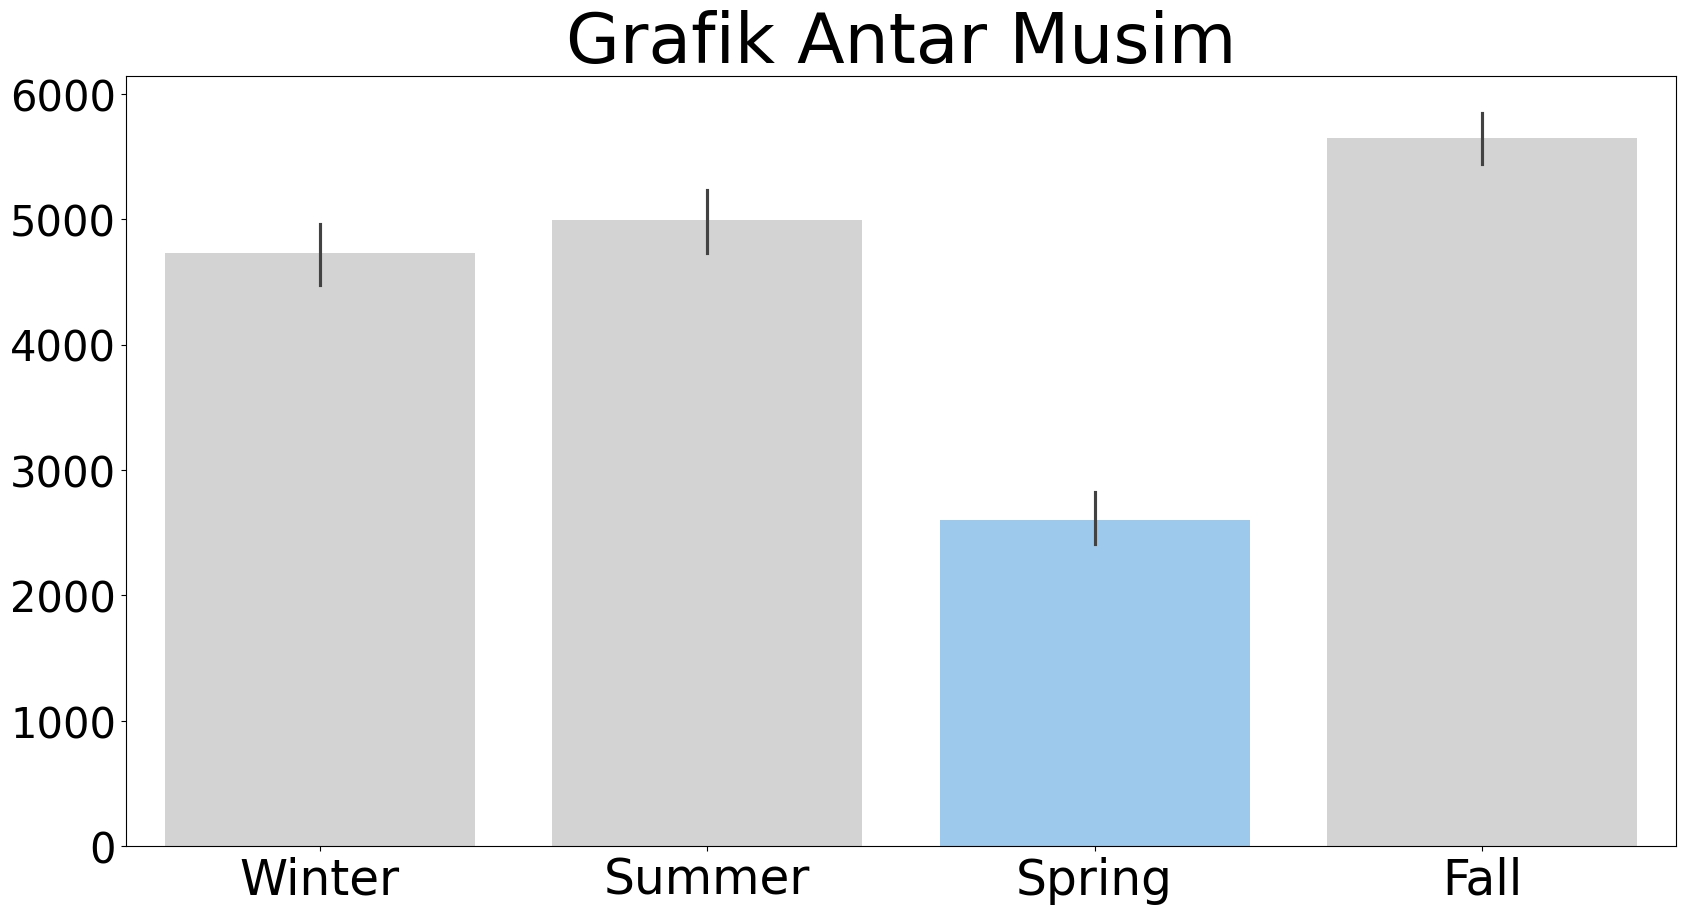

In [19]:
# Definisikan warna untuk barplot
bar_colors = ["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3"]

# Membuat figure dan axes dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(20, 10))

# Membuat bar plot dengan 'cnt' sebagai y dan 'season' sebagai x
sns.barplot(
    x="season",
    y="cnt",
    data=day_df.sort_values(by="season", ascending=False),
    palette=bar_colors,
    ax=ax
)

# Menyesuaikan judul, label, dan ukuran tick untuk sumbu x dan y
ax.set_title("Grafik Antar Musim", fontsize=50, loc="center")
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

# Menampilkan plot
plt.show()


Dari garfik di atas diperoleh musim yang paling banyak disewa ialah pada musim Fall (musim gugur) dengan total penyewaan pada musim gugur sebanyak 1061129 penyewaan

### Pertanyaan 3: Bagaimana Kinerja Penyewaan Perusahaan Sepeda Beberapa Tahun Terakhir?

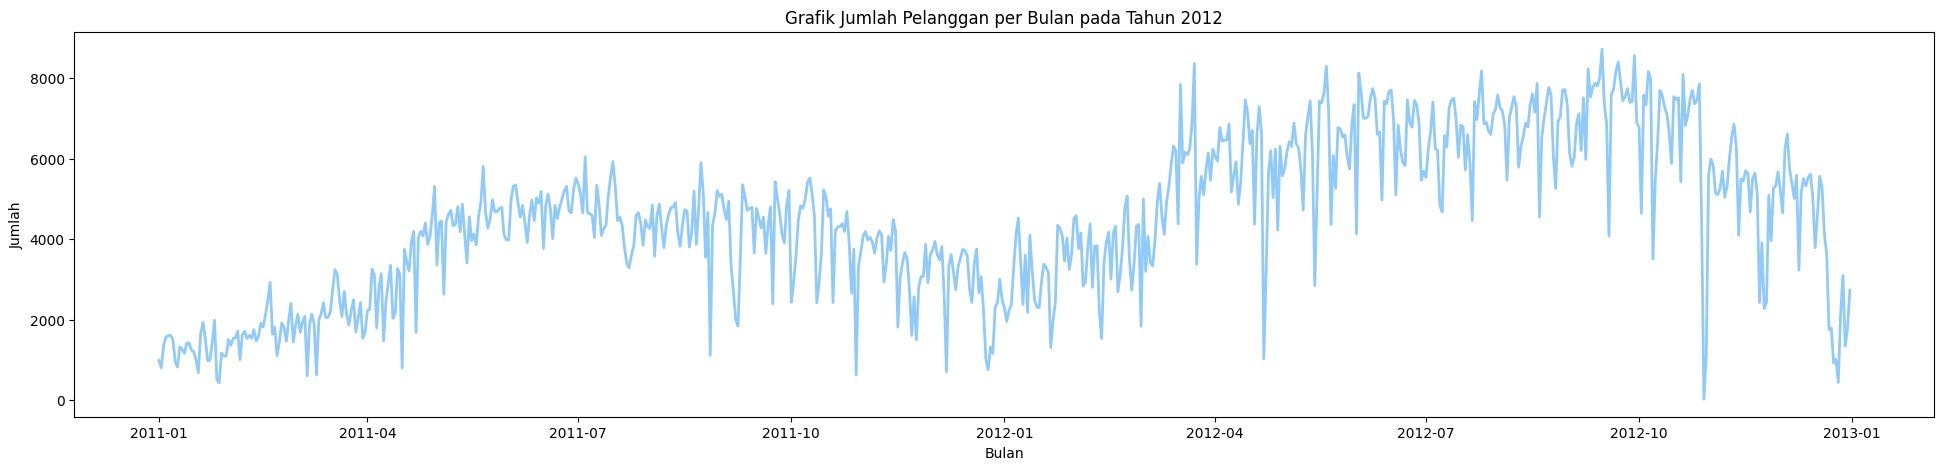

In [20]:
# Membuat figure dengan ukuran (24, 5)
plt.figure(figsize=(24, 5))

# Menghitung jumlah pelanggan maksimum per bulan
monthly_counts = day_df['cnt'].groupby(day_df['dteday']).max()

# Membuat line plot untuk jumlah pelanggan maksimum per bulan
plt.plot(monthly_counts.index, monthly_counts.values, color="#90CAF9", linewidth=2)

# Penamaan untuk sumbu x
plt.xlabel('Bulan')

# Penamaan untuk sumbu y
plt.ylabel('Jumlah')

# Judul grafik
plt.title('Grafik Jumlah Pelanggan per Bulan pada Tahun 2012')

# Menampilkan plot
plt.show()


Grafik diatas menunjukan kinerja perusahaan mengalami pertumbuhan positif dengan peningkatan jumlah pelanggan dari tahun 2011 hingga 2012. Meskipun terdapat fluktuasi yang signifikan, tren keseluruhan tetap menunjukkan peningkatan. Namun, terjadi penurunan jumlah pelanggan di akhir tahun 2012.

**Insight:**
- **Jam Penyewaan Tertinggi & Terendah**: Penyewaan sepeda terbanyak terjadi pada pukul 17:00 dengan sekitar 336.860 penyewaan, sedangkan penyewaan paling sedikit terjadi pada pukul 04:00 dengan sekitar 4.428 penyewaan.  
- **Musim dengan Penyewaan Tertinggi**: Penyewaan sepeda mencapai puncaknya pada musim gugur (Fall) dengan total 1.061.129 penyewaan.  
- **Tren Penyewaan Tahunan**: Jumlah pelanggan meningkat dari 2011 hingga 2012, meskipun terdapat fluktuasi, dengan sedikit penurunan di akhir tahun 2012.

In [22]:
day_df.to_csv("day_cleaned.csv", index=False)
hour_df.to_csv("hour_cleaned.csv", index=False)

## Analisis Lanjutan (Opsional)

## Conclusion

  **Pertanyaan:**  
- **Pertanyaan 1:** Jam berapa penyewaan sepeda terbanyak dan terkecil?  
- **Pertanyaan 2:** Pada musim apa penyewaan sepeda mencapai puncaknya?  
- **Pertanyaan 3:** Bagaimana kinerja Penyewaan Sepeda dalam beberapa tahun terakhir?  

**Conclusion Pertanyaan 1:** Berdasarkan grafik di atas, penyewaan sepeda paling banyak terjadi pada pukul 17:00 dengan sekitar 336.860 penyewaan. Sebaliknya, penyewaan paling sedikit terjadi pada pukul 04:00 dengan hanya sekitar 4.428 penyewaan.  

**Conclusion Pertanyaan 2:** Penyewaan sepeda mencapai puncaknya pada musim Fall (musim gugur) dengan total 1.061.129 penyewaan.  

**Conclusion Pertanyaan 3:** Grafik menunjukkan bahwa jumlah pelanggan mengalami pertumbuhan dari tahun 2011 hingga 2012 dengan tren yang meningkat secara keseluruhan. Namun, terdapat fluktuasi dalam jumlah pelanggan di beberapa bulan, dan terjadi sedikit penurunan pada akhir tahun 2012.